# Problem Statement

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Reading the Dataset

In [184]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the file : loan.csv is in same folder as python file
bike_dataframe = pd.read_csv('day.csv')
print(" The current (rows and columns) in dataset are ", bike_dataframe.shape)

 The current (rows and columns) in dataset are  (730, 16)


## 2. Cleaning the data

The checklist for the cleaning is followed.The observations were made by looking at file directly and for remaining applicable operations cleaning via code.
- Fix rows and columns
    * Incorrect rows 
    *  Summary rows 
    *  Extra rows
    *  Missing Column Names
    *  Inconsistent column names
    *  Unnecessary columns
    *  Columns containing Multiple data values 
    *  No Unique Identifier 
    *  Misaligned columns 


- Missing Values
  * Disguised Missing values
  * Significant number of Missing values in a row/column
  * Partial missing values

- Standardise Numbers
    * Non-standard units
    * Values with varying Scales 
    * Over-precision
    * Remove outliers
    
- Standardise Text
   * Extra characters
   * Different cases of same words
   * Non-standard formats
   
- Fix Invalid Values
  * Encoding Issues 
  * Incorrect data types
  * Correct values not in list
  * Wrong structure
  * Correct values beyond range
  * Validate internal rules
  
- Filter Data
    *  Duplicate data
    * Extra/Unnecessary  rows
    * Columns not relevant to analysis
    * Dispersed data


In [185]:
#validating names of columns and rename on basis of data dictionary:
#https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view

#dteday->date
#yr->year
#weathersit->weather
#hum->humidity
#atemp->temp_feel
print('Original columns \n')
print(list(bike_dataframe.columns.values))
bike_dataframe = bike_dataframe.rename(columns={'dteday': 'date', 'weathersit': 'weather', 'yr':'year', 'mnth':'month','hum':'humidity', 'atemp':'temp_feel','cnt':'count'})
print('\nRenamed columns \n')
print(list(bike_dataframe.columns.values))


Original columns 

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Renamed columns 

['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'temp_feel', 'humidity', 'windspeed', 'casual', 'registered', 'count']


In [186]:
#checking for columns with null/empty values

print(bike_dataframe.isnull().sum())
print('\n No null values')

instant       0
date          0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

 No null values


In [187]:
#remove columns instant , casual and registered as these are not feature columns

bike_dataframe.drop(columns=['casual', 'registered'], inplace=True)
list(bike_dataframe.columns.values)


['instant',
 'date',
 'season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weather',
 'temp',
 'temp_feel',
 'humidity',
 'windspeed',
 'count']

In [188]:
#replace the categorical data for 'season' , 'weathersit' as numbers don't make sense. 

bike_dataframe.info()
bike_dataframe['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)
bike_dataframe['weather'].replace({1: 'clear', 2:'misty', 3:'light snow', 4:'heavy rain'}, inplace=True)
bike_dataframe['season'] = bike_dataframe['season'].astype("string")
bike_dataframe['weather'] = bike_dataframe['weather'].astype("string")
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weather     730 non-null    int64  
 9   temp        730 non-null    float64
 10  temp_feel   730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  count       730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------------

In [189]:
#creating dummy columns for weather and season 
bike_dataframe = pd.get_dummies(bike_dataframe,
                     columns = ['season', 'weather'])
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant             730 non-null    int64  
 1   date                730 non-null    object 
 2   year                730 non-null    int64  
 3   month               730 non-null    int64  
 4   holiday             730 non-null    int64  
 5   weekday             730 non-null    int64  
 6   workingday          730 non-null    int64  
 7   temp                730 non-null    float64
 8   temp_feel           730 non-null    float64
 9   humidity            730 non-null    float64
 10  windspeed           730 non-null    float64
 11  count               730 non-null    int64  
 12  season_fall         730 non-null    uint8  
 13  season_spring       730 non-null    uint8  
 14  season_summer       730 non-null    uint8  
 15  season_winter       730 non-null    uint8  
 16  weather_

## 3. Univariate & Bivariate Analysis

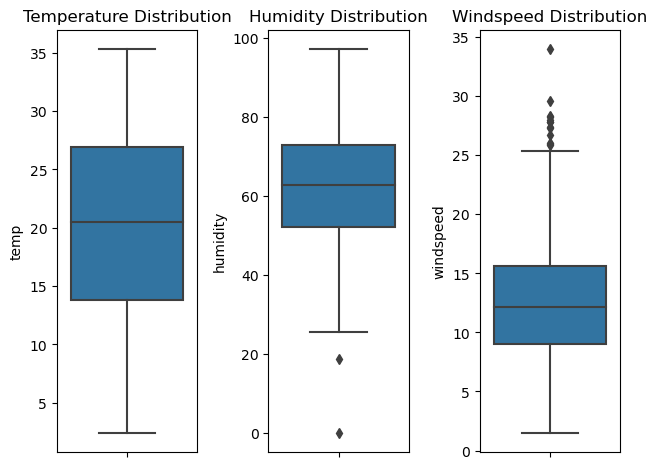

In [190]:
plt.subplot(1, 3, 1)
sns.boxplot(y='temp', data=bike_dataframe)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y='humidity', data=bike_dataframe)
plt.title('Humidity Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y='windspeed', data=bike_dataframe)
plt.title('Windspeed Distribution')

plt.tight_layout()
plt.show()

- The majority of the temperatures lie between ~14°C and ~27°C. 
- Humidity generally ranges between ~52% and ~73%, but there are a few outliers on the lower side.
- Windspeed is typically between ~9 and ~16, with a few higher values that could be outliers.

## 3. Model Building

### Split the data into training and testing sets

In [191]:
from sklearn.model_selection import train_test_split

# Define independent variables (X) and dependent variable (y)
X = bike_dataframe.drop(['count', 'date','instant'], axis=1)
y = bike_dataframe['count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Training data:', X_train.shape)
print('Testing data:', X_test.shape)

Training data: (511, 16)
Testing data: (219, 16)


### Running different models on this

- Linear Regression
- Decision Tree Regression
- Gradient Boosting Regression

#### Linear Regression

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Perform cross-validation to evaluate the model
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring="r2", cv=5)

lr_mean_score = lr_scores.mean()
lr_std_score = lr_scores.std()

lr_mean_score, lr_std_score

(0.8108732289205574, 0.051941741552008404)

#### Conclusion
- Average of r square value is 0.8109
- Standard Deviation of r square value is 0.0519

#### Decision Tree Regression

In [193]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation to evaluate the model
dt_scores = cross_val_score(dt_model, X_train, y_train, scoring="r2", cv=5)

dt_mean_score = dt_scores.mean()
dt_std_score = dt_scores.std()

dt_mean_score, dt_std_score

(0.764992717679063, 0.03394351150290839)

#### Conclusion
- Average of r square value is 0.7650
- Standard Deviation of r square value is 0.0339

#### Gradient Boosting Regression

In [194]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation to evaluate the model
gb_scores = cross_val_score(gb_model, X_train, y_train, scoring="r2", cv=5)

gb_mean_score = gb_scores.mean()
gb_std_score = gb_scores.std()

gb_mean_score, gb_std_score

(0.8689937515417199, 0.016879473588425235)

#### Conclusion
- Average of r square value is 0.8690
- Standard Deviation of r square value is 0.0169

## 4. Model Building

Gradient Boosting Regression has the highest r square value.
- Train the Gradient Boosting model on the entire training set.
- Perform residual analysis to ensure the assumptions of regression are met.
- Predict on the test set and calculate the r square score for the test set.

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

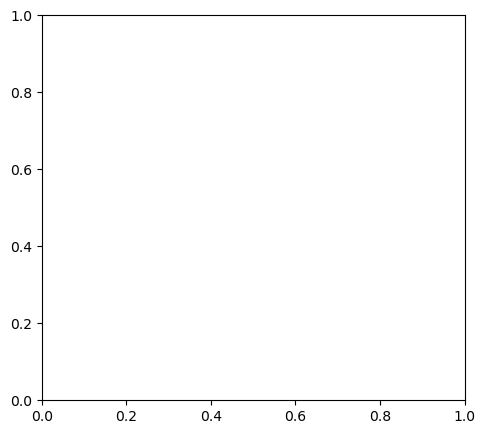

In [196]:
# Train the Gradient Boosting Regression model on the entire training set
gb_model.fit(X_train, y_train)

# Predict on the training set for residual analysis
y_train_pred = gb_model.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plotting residuals
plt.figure(figsize=(12, 5))

# Residuals vs Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


#### Conclusion
- Residuals vs. Predicted Values: In the plot, we can observe that the residuals are fairly random, although there might be slight patterns, suggesting potential non-linearity or interactions not captured by the model.
- Histogram of Residuals: The histogram suggests that the residuals are approximately normally distributed, which is one of the assumptions for regression.

#### Calculating R square score

In [200]:
from sklearn.metrics import r2_score

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Calculate the R-squared score on the test set
r2_test_score = r2_score(y_test, y_pred)

r2_test_score


0.8962918218117594

/var/folders/jl/2t3hvthd69g2m0q4m6v9vchh0000gn/T/ipykernel_33690/3225398674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bike_dataframe.corr()


<Figure size 1000x800 with 0 Axes>

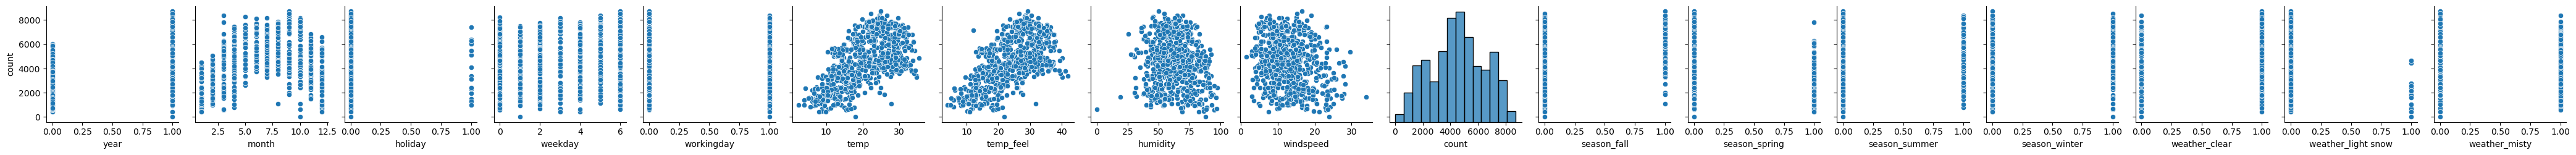

(1.0, 'count')

In [204]:
# Compute correlation coefficients
correlation_matrix = bike_dataframe.corr()

# Plot the pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(data=bike_dataframe, y_vars=['count'], x_vars=correlation_matrix.columns[1:])
plt.show()

# Find the highest correlation coefficient with the target variable
highest_correlation = correlation_matrix['count'].iloc[1:].max()
highest_correlation_feature = correlation_matrix['count'].iloc[1:].idxmax()

highest_correlation, highest_correlation_feature